# Desarrollo de aplicaciones avanzadas de ciencias computacionales

#### TC3002B.201: IA
Ramona Najera, A01423596


<br>
<table>
  <tr>
    <th>Avance 1</th>
    <th>Preguntas</th>
  </tr>
  <tr>
    <td>- Obtener, generar, aumentar dataset <br><br>
        - Separación training y test <br><br>
        - Técnicas de escalamiento <br><br>
        - Preprocesado de datos
    </td>
    <td>!!! NB. DO NOT USE CROSS-VALIDATION WITH THIS DATASET !!! <br>
        Just train and test only once with the above training and test sets. <br><br>
        ¿Hacer de cada spectral band una instancia de la clase? <br>
        O ¿Puedo mantenerlo como una sola y hacer un cuadrado? <br><br>
        Si dejo la info en una sola línea, ¿quito el Flatten? <br><br>
        Model shape warning <br><br>
        Model.summary Param # <br><br>
        Model.fit después de compilar vs inicialmente <br><br>
        Hiperparams <br><br>
        conv2d? <br><br>
        epochs
    </td>
  </tr>
</table>
<br>

In [216]:
# Conexión por google drive para obtener archivos de entrada
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
# Magic functions (interactúa con el servidor)
%cd '/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite'
!ls

/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite
Index  sat.doc	sat.trn  sat.tst


# Statlog

### Initial Dataset
🗃 [Landstat Satellite](https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite) (Climate & environment)

- 4435 training instances 🦾 <br>
- 2000 testing instances 📊 <br><br>

### Task: Classification
- 36 attributes (4 spectral bands x 9 pixels)
- Numerical attributes (between 0 and 255)
- 7 class labels (with no data for class 6)

In [218]:
class_names = ['red soil',                     # 1 → 0
               'cotton crop',                  # 2 → 1
               'grey soil',                    # 3 → 2
               'damp grey soil',               # 4 → 3
               'soil with vegetation stubble', # 5 → 4
               #'mixture class',               # 6 (NO DATA)
               'very damp grey soil']          # 7 → 5

In [220]:
print("🔍 DATASET PREVIEW\n  - 36 numbers for the pixels\n  - One for the class label\n")

with open("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.trn", 'r') as train_file:
  info = train_file.readline().strip('\n').split(" ")

  print(len(info),"elems per line of info\n")

  print(info[:-1])
  print(info[-1])

🔍 DATASET PREVIEW
  - 36 numbers for the pixels
  - One for the class label

37 elems per line of info

['92', '115', '120', '94', '84', '102', '106', '79', '84', '102', '102', '83', '101', '126', '133', '103', '92', '112', '118', '85', '84', '103', '104', '81', '102', '126', '134', '104', '88', '121', '128', '100', '84', '107', '113', '87']
3


### Feature scaling and preprocessing
1. Separate class label from pixels info
2. Class numbers will go from 0 to 5 to match `class_names` index
3. Remove unused class
4. Pixels will go from 0 to 1

In [221]:
import numpy as np

def obtain_data(filename):
  img_arr = []
  label_arr = []

  with open(filename, 'r') as data_file:
    for line in data_file:
      info = line.split(" ")

      # Last number is class label
      label_arr.append(int(info[-1]) - 1)

      # Remove extra class
      if label_arr[-1] == 6:
        label_arr[-1] = 5

      # Construct image
      pixels = []
      for pixel in info[:-1]:
        pixels.append((int(pixel) / 255.0))

      # 4 arrays (one per spectral band)
      img_arr.append(np.array_split(np.array(pixels), 4))

      # 6 arrays (for a square image)
      #img_arr.append(np.array_split(np.array(pixels), 6)) # PREGUNTA

      #img_arr.append(pixels) # PREGUNTA

  img_arr = np.array(img_arr)
  label_arr = np.array(label_arr).astype(np.uint8)

  print(img_arr[0],"\n")
  print(label_arr)

  return(img_arr, label_arr)

In [222]:
print("🦾 OBTAINING TRAIN INFO...\n")
train_images, train_labels = obtain_data("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.trn")

print("\n📊 OBTAINING TEST INFO...\n")
test_images, test_labels = obtain_data("/content/drive/MyDrive/Colab Notebooks/Recursos/A01423596/Satellite/sat.tst")

🦾 OBTAINING TRAIN INFO...

[[0.36078431 0.45098039 0.47058824 0.36862745 0.32941176 0.4
  0.41568627 0.30980392 0.32941176]
 [0.4        0.4        0.3254902  0.39607843 0.49411765 0.52156863
  0.40392157 0.36078431 0.43921569]
 [0.4627451  0.33333333 0.32941176 0.40392157 0.40784314 0.31764706
  0.4        0.49411765 0.5254902 ]
 [0.40784314 0.34509804 0.4745098  0.50196078 0.39215686 0.32941176
  0.41960784 0.44313725 0.34117647]] 

[2 2 2 ... 3 3 3]

📊 OBTAINING TEST INFO...

[[0.31372549 0.4        0.4        0.30980392 0.29803922 0.4
  0.4        0.30980392 0.29803922]
 [0.4        0.41568627 0.3254902  0.29803922 0.38823529 0.42352941
  0.33333333 0.29803922 0.40392157]
 [0.4627451  0.34509804 0.31372549 0.41960784 0.4627451  0.34509804
  0.30980392 0.41960784 0.42745098]
 [0.34117647 0.30980392 0.41960784 0.42745098 0.34117647 0.30980392
  0.41960784 0.44313725 0.34117647]] 

[2 2 3 ... 4 4 4]


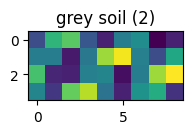

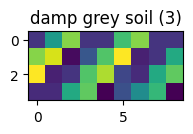

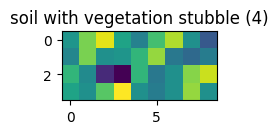

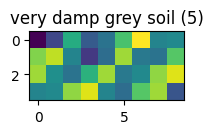

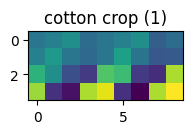

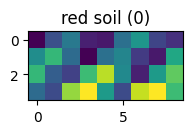

In [223]:
import matplotlib.pyplot as plt

examples = 6
types = set()

# 🔍 CLASS EXAMPLE PREVIEW
for i in range(len(train_labels)):
  if not examples:
    break

  if train_labels[i] not in types:
    plt.figure(figsize=(2,2))
    plt.imshow(train_images[i])

    #plt.colorbar()
    plt.title(f'{class_names[train_labels[i]]} ({train_labels[i]})')

    plt.show()

    types.add(train_labels[i])
    examples = examples - 1

In [226]:
import tensorflow as tf

# Helper libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Simple model multilayer perceptron (neural network)
model  =  Sequential([ # Conectado en orden
                    Flatten(input_shape=train_images[0].shape), # Matrices se vuelven una sola línea
                    Dense(128, activation='relu'), # Neuronas intermedias
                    Dense(6, activation='softmax') # Neuronas de salida (# de clases)
          ])

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,510 (21.52 KB)

 Trainable params: 5,510 (21.52 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
# Compile model with an optimiser, loss function and metric
model.compile(optimizer="adam", # Forma de gradiente descendiente
              loss="sparse_categorical_crossentropy", # Presentación del error
              metrics =['accuracy']) # Evaluación del comportamiento

# Entrena con datos, respuestas y épocas
history = model.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3186 - loss: 1.6273
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5683 - loss: 1.3084
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7159 - loss: 1.0607
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7940 - loss: 0.8843
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7833 - loss: 0.7876
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.6740
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.6476
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.6027
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8260 - loss: 0.5349
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8259 - loss: 0.5177
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.5006
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

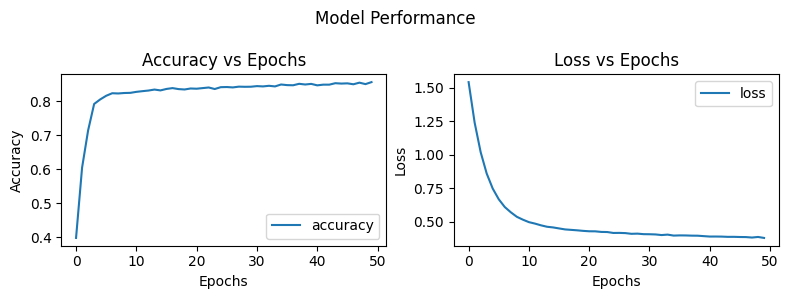

In [228]:
import pandas as pd

# Load history into dataframe to analyze learning performance
df = pd.DataFrame(history.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('Model Performance')

acc_vs_epochs = df.plot(y="accuracy", title="Accuracy vs Epochs", legend=True, ax=ax1)
acc_vs_epochs.set(xlabel="Epochs", ylabel="Accuracy")

loss_vs_epochs = df.plot(y="loss", title = "Loss vs Epochs",legend=True, ax=ax2)
loss_vs_epochs.set(xlabel="Epochs", ylabel="Loss")

plt.tight_layout()

In [229]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc) # Overfitting: gap between traing acc and test acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.4145

Test accuracy: 0.8379999995231628


In [230]:
# Make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()]) # Model linear outputs are transformed into probabilities

predictions = probability_model.predict(test_images)

print("\n1st prediction\n", predictions[0])
print("\nHighest confidence value:", np.argmax(predictions[0]))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

1st prediction
 [0.16903144 0.13640006 0.2715424  0.15005215 0.13644244 0.13653146]

Highest confidence value: 2


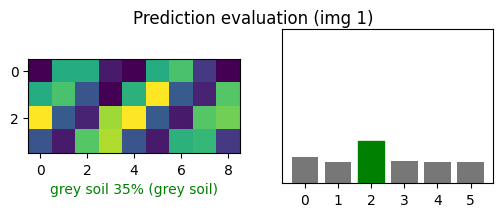

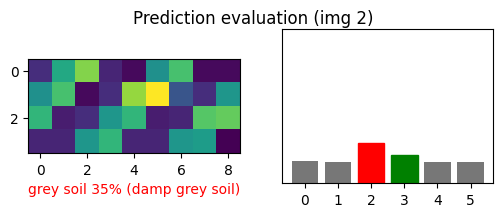

In [231]:
# Verify predictions
def plot_comparison(idx):
  predicted_label = np.argmax(predictions[idx])

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
  fig.suptitle(f"Prediction evaluation (img {idx})")

  plt.subplot(1,2,1)
  plt.imshow(test_images[idx])

  if predicted_label == test_labels[idx]:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {int(100*np.max(predictions))}% ({class_names[test_labels[idx]]})", color=color)

  plt.subplot(1,2,2)
  plt.xticks(range(len(class_names)))
  plt.yticks([])

  prediction_plt = plt.bar(range(len(class_names)), predictions[idx], color="#777777")
  plt.ylim([0, 1])

  prediction_plt[predicted_label].set_color('red')
  prediction_plt[test_labels[idx]].set_color('green')

plot_comparison(1)
plot_comparison(2)

In [232]:
from tabulate import tabulate

# Confusion matrix
count_predictions = []

for i in range(len(class_names)):
  count_predictions.append([0 for i in range(len(class_names) + 2)])
  count_predictions[i][0] = i

for i in range(len(test_labels)):
  count_predictions[test_labels[i]][np.argmax(predictions[i]) + 1] += 1
  count_predictions[test_labels[i]][7] += 1

print(tabulate(count_predictions, headers=['↓ True vs Predicted →', '0', '1', '2', '3', '4', '5', '↓ Total ↓']))

  ↓ True vs Predicted →    0    1    2    3    4    5    ↓ Total ↓
-----------------------  ---  ---  ---  ---  ---  ---  -----------
                      0  458    0    2    0    1    0          461
                      1    0  209    0    1   14    0          224
                      2    2    0  387    4    2    2          397
                      3    1    0   57   87   11   55          211
                      4   25   14    0    7  164   27          237
                      5    0    0   15   64   20  371          470


1er avance: 6 de abril del 2025